In [1]:
import numpy as np
import plotly as py
import plotly.graph_objs as go
from collections import defaultdict

4.7.1


In [92]:
class HilberCurveGenerator:
    def __init__(self):
        self.space_alphabet = 'ABCD'
        self.recurrence_matrix = np.array([[0, 3, 2, 1],
                                           [0, 1, 2, 3],
                                           [0, 1, 2, 3],
                                           [2, 1, 0, 3]
                                           ]
                                          )
        self.quad_mappings = {'A': np.array([-1.0, -1.0]),
                              'B': np.array([-1.0, 1.0]),
                              'C': np.array([1.0, 1.0]),
                              'D': np.array([1.0, -1.0])
                              }

    def __recurse(self, base_array=None):
        if not base_array:
            base_array = self.space_alphabet

        next_results = []
        # Initial Run?

        if type(base_array) == str:
            base_array = np.array(list(base_array))
            # use idx to lookup reorder opperation to perform of base_array
            for idx, quad in enumerate(base_array):
                reorder_array = self.recurrence_matrix[idx]
                reordered_base = base_array[reorder_array]
                next_result = quad + '|' + ''.join(reordered_base)
                next_results.append(next_result)
        else:
            for quad_data in base_array:
                quad_base, base_array = quad_data.split('|')
                reordered_bases = self.__recurse(base_array=base_array)
                _ = [next_results.append(quad_base + reordered_base)
                     for reordered_base in reordered_bases]
        return next_results

    def __expand_last_recursion(self, quad_values):
        expanded_quads = []
        for quad_data in quad_values:
            quad_base, base_array = quad_data.split('|')
            _ = [expanded_quads.append(quad_base + sub_quad)
                 for sub_quad in base_array]
        return expanded_quads

    def generate_curve(self, plot_depth, return_plot_data=True):
        trace_data = defaultdict(lambda: defaultdict(lambda: []))

        recursed_data = None
        
        if plot_depth == 1:
            quad_labels = list(self.space_alphabet)
        else:
            for depth in range(1, plot_depth):
                if not recursed_data:
                    recursed_data = self.__recurse(base_array=self.space_alphabet)
                else:
                    recursed_data = self.__recurse(base_array=recursed_data)

                quad_labels = self.__expand_last_recursion(recursed_data)

        return quad_labels

In [96]:
hc_gen = HilberCurveGenerator()
hc_seq = hc_gen.generate_curve(plot_depth=4)
print(hc_seq)

['AAAA', 'AAAD', 'AAAC', 'AAAB', 'AABA', 'AABB', 'AABC', 'AABD', 'AACA', 'AACB', 'AACC', 'AACD', 'AADC', 'AADB', 'AADA', 'AADD', 'ADAA', 'ADAB', 'ADAC', 'ADAD', 'ADDA', 'ADDD', 'ADDC', 'ADDB', 'ADCA', 'ADCD', 'ADCC', 'ADCB', 'ADBC', 'ADBD', 'ADBA', 'ADBB', 'ACAA', 'ACAB', 'ACAC', 'ACAD', 'ACDA', 'ACDD', 'ACDC', 'ACDB', 'ACCA', 'ACCD', 'ACCC', 'ACCB', 'ACBC', 'ACBD', 'ACBA', 'ACBB', 'ABCC', 'ABCB', 'ABCA', 'ABCD', 'ABDC', 'ABDD', 'ABDA', 'ABDB', 'ABAC', 'ABAD', 'ABAA', 'ABAB', 'ABBA', 'ABBD', 'ABBC', 'ABBB', 'BAAA', 'BAAB', 'BAAC', 'BAAD', 'BADA', 'BADD', 'BADC', 'BADB', 'BACA', 'BACD', 'BACC', 'BACB', 'BABC', 'BABD', 'BABA', 'BABB', 'BBAA', 'BBAD', 'BBAC', 'BBAB', 'BBBA', 'BBBB', 'BBBC', 'BBBD', 'BBCA', 'BBCB', 'BBCC', 'BBCD', 'BBDC', 'BBDB', 'BBDA', 'BBDD', 'BCAA', 'BCAD', 'BCAC', 'BCAB', 'BCBA', 'BCBB', 'BCBC', 'BCBD', 'BCCA', 'BCCB', 'BCCC', 'BCCD', 'BCDC', 'BCDB', 'BCDA', 'BCDD', 'BDCC', 'BDCD', 'BDCA', 'BDCB', 'BDBC', 'BDBB', 'BDBA', 'BDBD', 'BDAC', 'BDAB', 'BDAA', 'BDAD', 'BDDA',

In [97]:
def hilbert_index(seq):
    '''
    Converts input sequence into matrix index 
    for space filling curve in 4 quadrants ABCD
    
    Parameters:
    ----------
    seq: String
        Input string to be converted 
        
    Returns
    -------
    index: list
        List of x,y matrix indices 
    '''
    rules = {'a': np.array([0,0]),
             'b': np.array([0,1]),
             'c': np.array([1,1]),
             'd': np.array([1,0])
            }
    dim = 2
    index = np.array([])
    
    for order, val in enumerate(seq[::-1].lower()):
        if index.size == 0:
            index = np.zeros_like(rules[val])
        index += (dim ** order) * rules[val] 
    
    return index.tolist()

In [98]:
order = 4
coordinates = []
for i, seq in enumerate(hc_seq):
    coordinates.append(hilbert_index(seq))

x_vals = [(x*2+1)/(2**(order+1)) for [x,y] in coordinates]
y_vals = [(y*2+1)/(2**(order+1)) for [x,y] in coordinates]

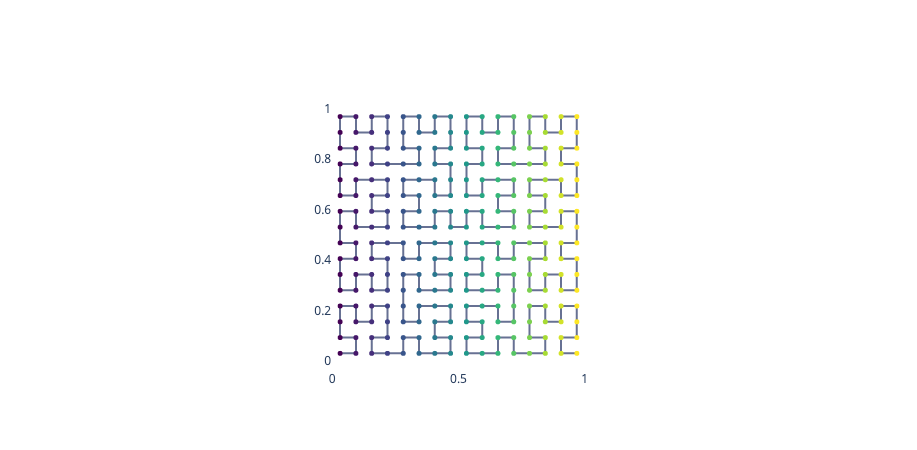

In [99]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = x_vals,
                         y = y_vals,
                         name='hilbert-curve-order2',
                         mode='lines+markers',
                         marker=dict(
                             size=5,
                             color=x_vals,
                             colorscale='Viridis'),
                        line=dict(
                            color='#677193',
                            width=2)))

fig.layout.plot_bgcolor = 'white'

fig.update_layout(
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    ),
    xaxis = dict(
        range=(0, 1),
        constrain='domain'
    )
)
fig.show()

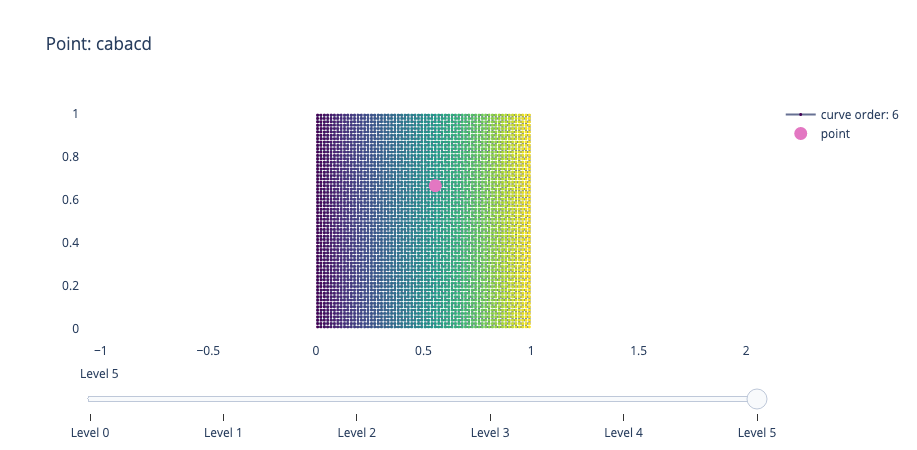

In [170]:
sequence = 'cabacd'

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(1, len(sequence)+1, 1):
    hc_gen = HilberCurveGenerator()
    hc_seq = hc_gen.generate_curve(plot_depth=step)
    
    coordinates = []
    for i, seq in enumerate(hc_seq):
        coordinates.append(hilbert_index(seq))

    x_vals = [(x*2+1)/(2**(step+1)) for [x,y] in coordinates]
    y_vals = [(y*2+1)/(2**(step+1)) for [x,y] in coordinates]

    fig.add_trace(
        go.Scatter(
            x = x_vals,
            y = y_vals,
            name='curve order: ' + str(step),
            mode='lines+markers',
            marker=dict(
                size=21-(step*3),
                color=x_vals,
                colorscale='Viridis'),
            line=dict(
                color='#677193',
                width=2),
            visible=False))

for step in np.arange(1, len(sequence)+1, 1):
    #point
    hc_point = hilbert_index(sequence[:step])
    x_point = hc_point[0]
    x_point = (x_point*2+1)/(2**(step+1))
    
    y_point = hc_point[1]
    y_point = (y_point*2+1)/(2**(step+1))
    
    fig.add_trace(go.Scatter(x = [x_point],
                         y = [y_point],
                         name='point',
                         mode='markers',
                         visible=False,
                         marker=dict(
                               size=25-(step*2),
                               color='#e377c2')))

# Create and add slider
steps = []

for i, st in enumerate(fig.data[::2]):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data[::2])},
              {"title": "Point: " + sequence[:i+1]}],
        label='Level {}'.format(i))
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
    
# Make last trace visible
fig.data[len(sequence)-1].visible = True
fig.data[len(fig.data)-1].visible = True

sliders = [dict(
    active=len(sequence)-1,
    currentvalue={"prefix": ""},
    steps=steps
)]

fig.layout.plot_bgcolor = 'white'

fig.update_layout(
    title="Point: " + sequence,
    sliders=sliders,
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    ),
    xaxis = dict(
        range=(0, 1),
    )
)

fig.show()